# 1.Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# 2.Reading the Data

In [2]:
data=pd.read_csv(r'C:\Users\HP\SHUBHAM PYTHON\Advertising.csv',index_col=0,header=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
print(data.dtypes)
print(data.shape)
print(data.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [4]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# 3. Assumption 1

### There should be no outliers in the data

Check using boxplot

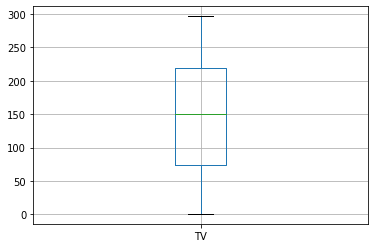

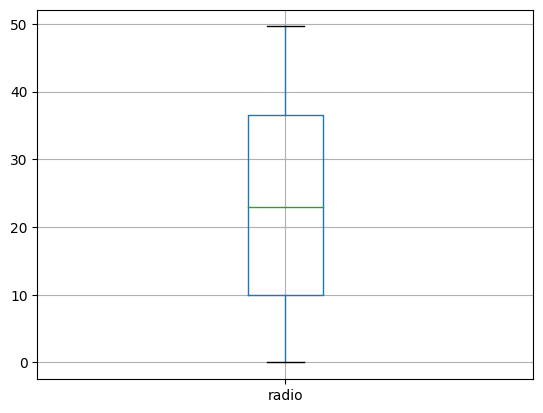

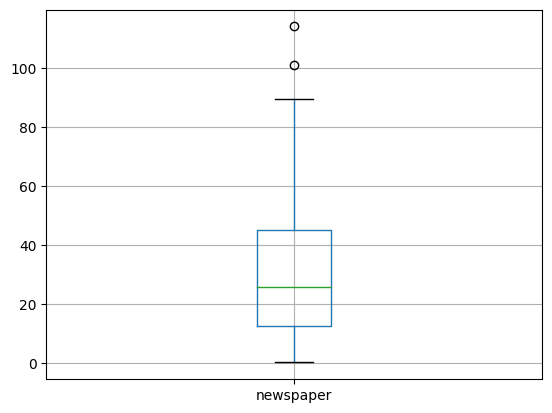

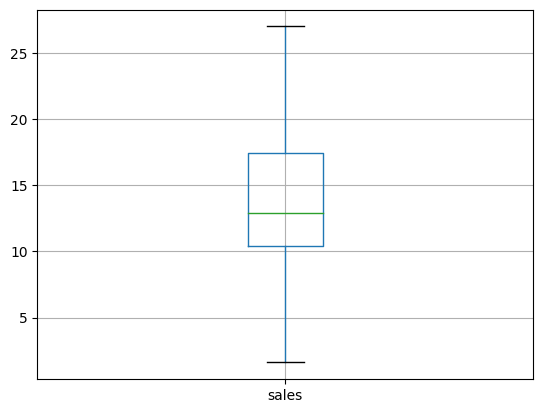

In [5]:
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

# 4. Assumption 2

### Assumption of Linearity

Every independent variable should have a linear relationship with the dependent variable

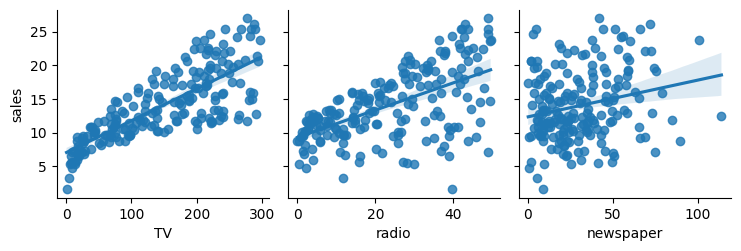

In [6]:
#plt.figure(figsize=(30,15))
sns.pairplot(data,x_vars=data.columns[0:-1],y_vars="sales",kind="reg")
plt.show()
# You can also try printing the x variable by just typing the name of the variable
# rather than using index
# sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',kind='reg')

In [7]:
data.columns 

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [8]:
# Incase you want to drop a variable use the following function
# axis=1 because we are dropping a column an to make permanent changes use inplace=True

# data.drop("newspaper",axis=1,inplace=True)

# 5. Create X and Y

X=Independent variables and Y=Dependent varaible

In [9]:
X=data[['TV', 'radio', 'newspaper']]
Y=data['sales']
# To assign X and Y using indexing then write the following code
# X=data.iloc[:,0:-1]
# Y=data.iloc[:,-1]

# 6. Assumption 3

### Assumption of Normality

The dependent variable must follow an approximate normal distribution

C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

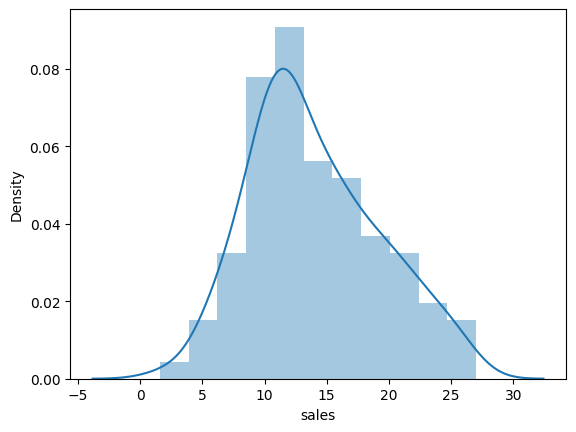

In [10]:
sns.distplot(Y)

In [11]:
"""
# Log transformation
import numpy as np
Y_log =np.log(Y)
"""
# incase the dependent variable does not form proper normality then use log transformation
# when the data is skewed then only use log transformation then
# you will get a good curve unnecessarily dont use log transformation

'\n# Log transformation\nimport numpy as np\nY_log =np.log(Y)\n'

In [12]:
# sns.distplot(Y_log,hist=True)

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>],
       [<AxesSubplot:title={'center':'newspaper'}>, <AxesSubplot:>]],
      dtype=object)

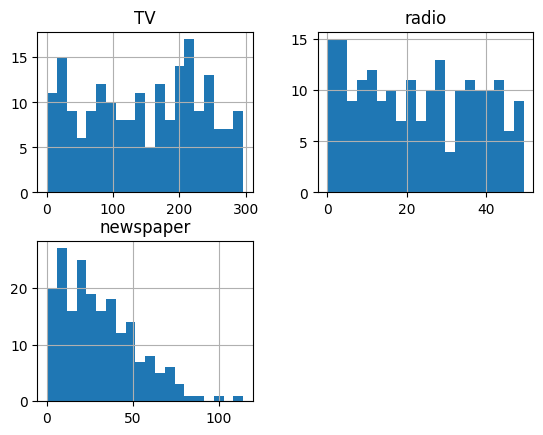

In [13]:
# Not a mandatory step
# To check skewness in X varaibles
X.hist(bins=20)

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
# To handle skewness in X variables

from scipy.stats import skew


# finding the skewness in each variable
#Skewness value will be generated for every variable in X
data_num_skew = X.apply(lambda i: skew(i.dropna()))
# In the above code what we will do is we will first find the skewness of each variable in X
# Here apply function is used to apply lambda for every variable in X
# dropna is used such that if there any missing value in X then first drop those missing 
# values and then on the remaining non missing values find out the skewness 



#Subsetting the variables that are highly skewed
data_num_skewed=data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transform for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])
# sometimes variables contain value 0 so log(0)=-infinity 
# but infinity is not a value so in order to avoid that error
# we use log 1p 

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


# 7. Assumption 4

#### There should be no multicolinearity between independent variable

Multicollinearity is the relationship amongst the independent variables

Correlation is the amount and the magnitude of the relationship between the variables.

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


<AxesSubplot:>

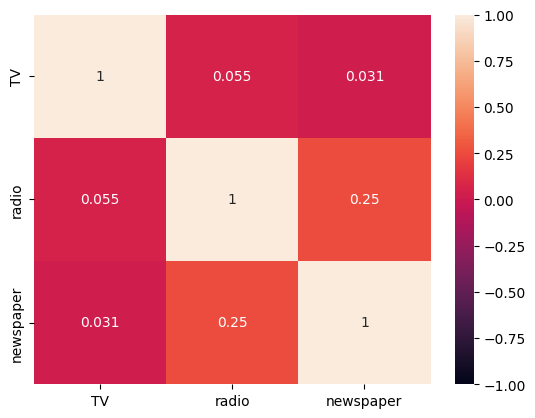

In [16]:
corr_df=X.corr(method="pearson")#spermen rank coefficient,kindels corr methods
print(corr_df)
sns.heatmap(corr_df,vmax=1.0,vmin=-1,annot=True)
# vmax,vmin are the ranges 
# annot=True is used to display the values in the heat map

# Variance Inflation Factor

A variance inflation factor(VIF) detects multicollinearity in regression analysis.

Variance inflation factors allow a quick measure of how much a variable is contributing to the standard error in the regression.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df=pd.DataFrame() # Creating a new data frame
vif_df["features"]=X.columns # storing all values from X in features
vif_df["VIF factor"]=[vif(X.values,i)for i in range(X.shape[1])]
# In the above code X.values,i will perform an iterative function where it will 
# take one variable as a dependent and the other two variable as independent
vif_df.round(2)

,features,VIF factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [18]:
#X.drop("newspaper",axis=1,inplace=True)
#rerun the VIF code

# 8: Train Test Split

It is a function which is used  when you want to split your data into a training set and a testing set

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

test size=how much of data will you reserve for testing part 0.2 indicates 80-20 split

default=75-25 ratio

random_state=splitting process to be done equivalently

 <1000 observations = 80-20 split
 >1000 observations = 70-30 split

default=75-25 split

In [20]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


# 9. Building The Model

In [21]:
from sklearn.linear_model import LinearRegression

# Step 1:Creating a model object
lm=LinearRegression()

# Step 2: Training the model object on the train part
lm.fit(X_train,Y_train)# It will provide you with the best fit line

# Step 3: Printing the intercept and coefficients
print(lm.intercept_) # It will give you β0 value
print(lm.coef_) # It will give you β1,β2,β3 values

3.353291385815158
[ 0.0437425   0.19303708 -0.04895137]


In [22]:
# Pair the feature names with the coefficients
print(list(zip(X.columns,lm.coef_)))
# It actuall indiactes how much of sales will increase if you add a thousand dollars

[('TV', 0.04374250157742163), ('radio', 0.19303707897345296), ('newspaper', -0.04895136822248805)]


In [23]:
#not feasible for bulk observations
X1=100
X2=200
X3=np.log1p(0)
Y_pred=3.353291385815158+(0.0437425 *X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)

46.33495738581516


In [24]:
#predict using the model

Y_pred=lm.predict(X_test)
print(Y_pred)
# Here what you will get is 40 values for the X_test 40 Observations

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [25]:
lm.score(X_train,Y_train)
# It will provide you with the r2 value on the training data

0.920898664750022

# 10. Evaluating the model

In [26]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-square:",r2)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
adjusted_r_squared=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted_r_squared:",adjusted_r_squared)

R-square: 0.8348010719035319
RMSE: 2.592976911093061
Adjusted_r_squared: 0.8322725168816472


In [27]:
print(Y_test.min()) # RMSE value should always be close to the min Y value
print(Y_test.max())

1.6
25.5


Upto now the model looks good so try saving it

In [28]:
new_df=pd.DataFrame()
new_df=X_test
new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df.head()

,TV,radio,newspaper,Actual sales,Predicted sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510


In [29]:
new_df["Deviation"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales Prediction2.xlsx",header=True,index=True)
new_df.head()

,TV,radio,newspaper,Actual sales,Predicted sales,Deviation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490


# 11.Ridge Regression

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [31]:
from sklearn.linear_model import Ridge
lm=Ridge()
lm.fit(X_train,Y_train)
print(lm.intercept_)
print(lm.coef_)

3.3522471725965985
[ 0.04374234  0.19302603 -0.04853131]


In [32]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.14984366 12.961602   18.05844603 23.66046356 20.68752578 14.26318679
 14.9278479  21.38857787 21.14736702 12.75811738 23.99745819  7.20656373
 12.30813313 19.22822402 19.41619189 13.44941112 19.62559951  9.24628306
 21.1051215  20.87807898 15.52579217 10.91642817 22.82923662 15.82939321
 17.40752649  8.17207209 11.88688403 12.69878967 21.71245614  7.94914659
 12.49142141 20.43289143  4.71465713  4.7216782  16.75029355 15.74408175
  6.74767421 17.73713545  9.01204512 13.60840942]


In [33]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-square:",r2)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
adjusted_r_squared=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted_r_squared:",adjusted_r_squared)

R-square: 0.8348082644975936
RMSE: 2.5929204626839972
Adjusted_r_squared: 0.8322798195664343


# 12. Lasso Regression

In [34]:
from sklearn.linear_model import Lasso
lm=Lasso()
lm.fit(X_train,Y_train)
print(lm.intercept_)
print(lm.coef_)

3.336794058220317
[ 0.04362374  0.18766033 -0.        ]


In [35]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.06429565 12.89291061 18.06240985 23.59022036 20.60240696 14.24765273
 14.95215852 21.28397604 21.03270918 12.70073142 23.91262327  7.30875314
 12.27479157 19.18615151 19.40987087 13.37169781 19.52635995  9.18340605
 21.01174436 20.74314144 15.48896526 10.79867965 22.74877319 15.78495133
 17.45553519  8.22914947 11.77231457 12.65310134 21.59003277  7.96379194
 12.53499059 20.35780103  4.83670342  4.8659235  16.78762249 15.83910155
  6.83541797 17.72822269  9.10768074 13.67675885]


In [36]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred)
print("R-square:",r2)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
adjusted_r_squared=1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted_r_squared:",adjusted_r_squared)

R-square: 0.8360506658527163
RMSE: 2.5831514271094234
Adjusted_r_squared: 0.8335412372688292


# 13.Stats Model

In [37]:
# OLS-->OLS(Y_train,X_train)
# ols-->ols(Y~X1+X2+X3)

In [38]:
new_df=pd.DataFrame()
new_df=X_train
new_df["sales"]=Y_train
new_df.shape

(160, 4)

In [39]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper', 
                  data=new_df).fit()#data=new_df defines from where the data is obtained

# print the coefficients
print(lm_model.params)#it will provide you with the intercept and the slope coefficient
print()
print()
print(lm_model.summary())#it will give you the detailed output in the form of predetailed table

"""
3.3532913858151527
[ 0.0437425   0.19303708 -0.04895137]

"""

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           1.10e-85
Time:                        14:15:45   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

'\n3.3532913858151527\n[ 0.0437425   0.19303708 -0.04895137]\n\n'

In [40]:
Y_pred_new=lm_model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print('r2 =', r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print('rmse =', rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('adjusted_r_squared =',adjusted_r_squared)

r2 = 0.8348010719035378
rmse = 2.5929769110930145
adjusted_r_squared = 0.8322725168816532


In [41]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio ', 
                  data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           3.47e-87
Time:                        14:15:45   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [42]:
Y_pred_new=lm_model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print( r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print( rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8354496662944216
2.587881707737811
0.8329310387377036


# 14.Diagnostic Plot

### Assumption 1 : Errors should be random

### Residue VS Fitted Plot 

Text(0, 0.5, 'Residuals')

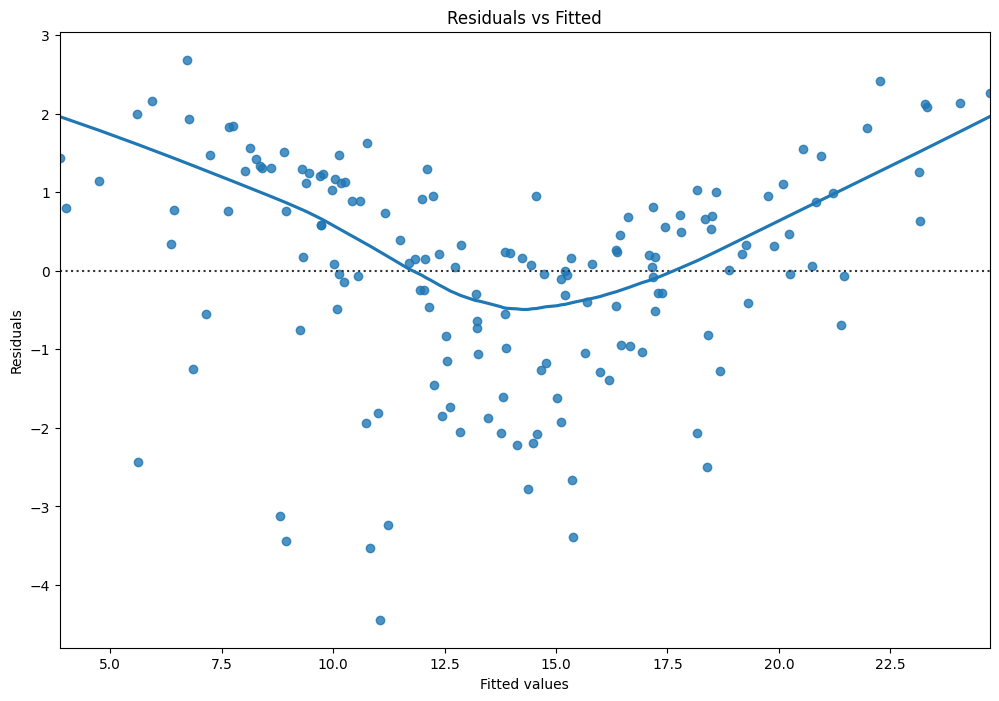

In [43]:

import matplotlib.pyplot as plt
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues# it will give pedictetd values

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'sales', data=new_df, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

### Assumption 2 : Errors should follow a approximate normal distribution

#### Checking using Normal QQ plot

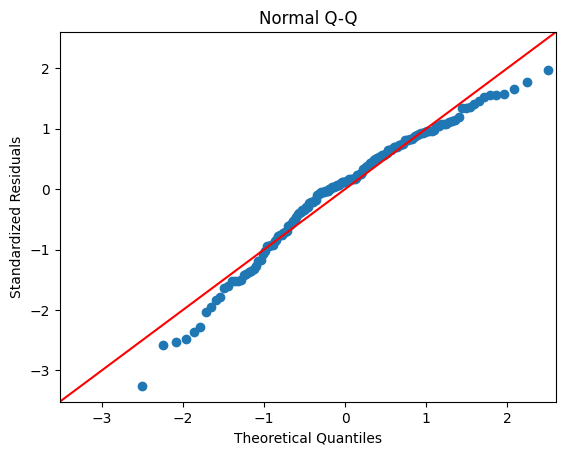

In [44]:
res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res,  fit=True, line='45')#45 degree angle
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

The error points should follow the red diagonal line to meet the assumption

### Assumption 3 :Errors should follow a constant variance-->Homoskedasticity

#### Checking using Scale location plot

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

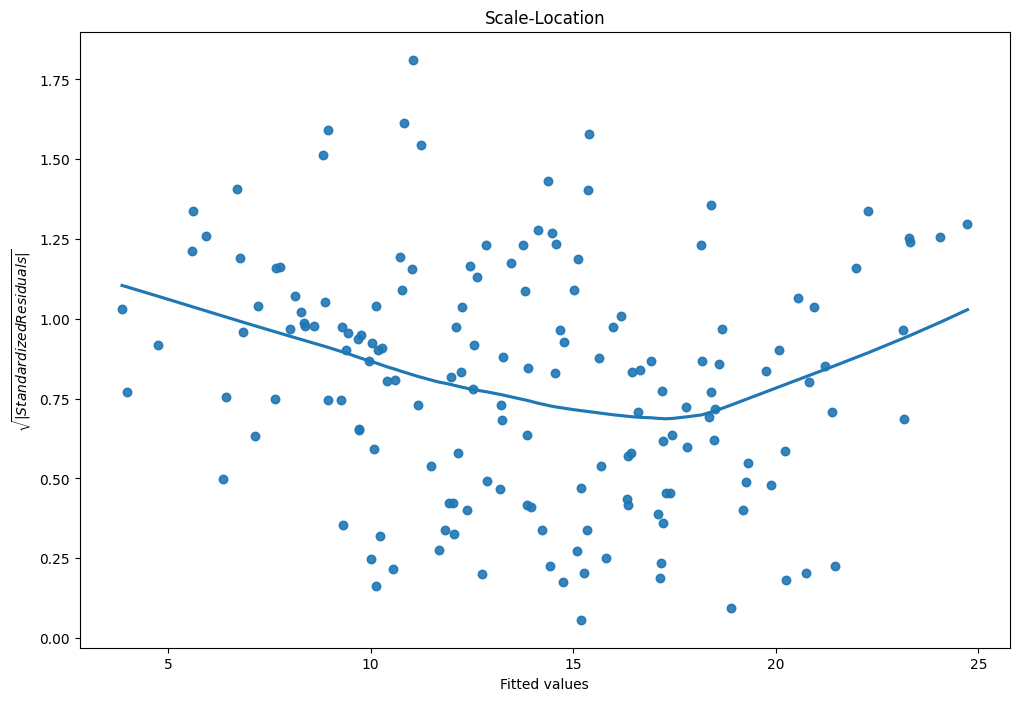

In [45]:
# normalized residuals
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')3   

We should get to see a approximately horizontal line fitted into a data that means constant variant There should not be a stiff curve line because that indicates unequal variance

# 15. Stochastic Gradient Descent (SGD)

In [46]:
# Creating X & Y
X=data[["TV","radio","newspaper"]]
Y=data["sales"]

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()# Creating a model object which will define the function


X=scaler.fit_transform(X)# It is a combination of fit and transform

#scaler.fit(X) # It will traverse through every variable in X and find out the mean and SD

#X=scaler.transform(X)# It will take the values of mean and SD and then it will transform
                      # and provide you with the values of x
print(X)

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e-01]
 [ 3.00679600e-03  4.29449843e-

Scaling should be done only on X and not in Y because X is a independent variable and Y is a dependent variable.For scaling we require multiple variables 

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [49]:
from sklearn.linear_model import SGDRegressor
lm = SGDRegressor(learning_rate="constant",#want to use a constant learning rate
                  eta0=0.01,               #alpha
                  shuffle=True,            #while going ahead with the next epoch shuffle the obs
                  random_state=10,         #set seed
                  max_iter=1000,           #max no of epochs( have passed default value=1000)
                  early_stopping=True,     #stop if zero convergence is reached first
                  n_iter_no_change=5)      #no of obs to wait for before concluding upon early stopping
                                           # for zero conevrgenge use n_iter_no_change=3
lm.fit(X_train,Y_train)


# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

[14.12339593]
[ 3.81092365  2.80450708 -0.04411337]


In [50]:
Y_pred_new=lm.predict(X_test) # we always predict upon the texting data
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
r2=r2_score(Y_test,Y_pred_new)
print( r2)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print( rmse)
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8385034893701074
2.5637555216282193
0.8360316040033233
